In [26]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [29]:
df = pd.read_csv('gender_classification_v7.csv')

In [28]:
print(df.head())
print(df.info())
print(df.describe().T)

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


None

,count,mean,std,min,25%,50%,75%,max
long_hair,5001.0,0.869626,0.336748,0.0,1.0,1.0,1.0,1.0
forehead_width_cm,5001.0,13.181484,1.107128,11.4,12.2,13.1,14.0,15.5
forehead_height_cm,5001.0,5.946311,0.541268,5.1,5.5,5.9,6.4,7.1
nose_wide,5001.0,0.493901,0.500013,0.0,0.0,0.0,1.0,1.0
nose_long,5001.0,0.507898,0.499988,0.0,0.0,1.0,1.0,1.0
lips_thin,5001.0,0.493101,0.500002,0.0,0.0,0.0,1.0,1.0
distance_nose_to_lip_long,5001.0,0.498900,0.500049,0.0,0.0,0.0,1.0,1.0


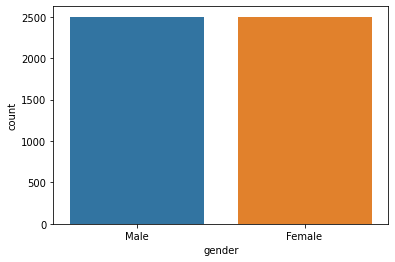

In [10]:
#Understand the data 
sns.countplot(x="gender", data=df)

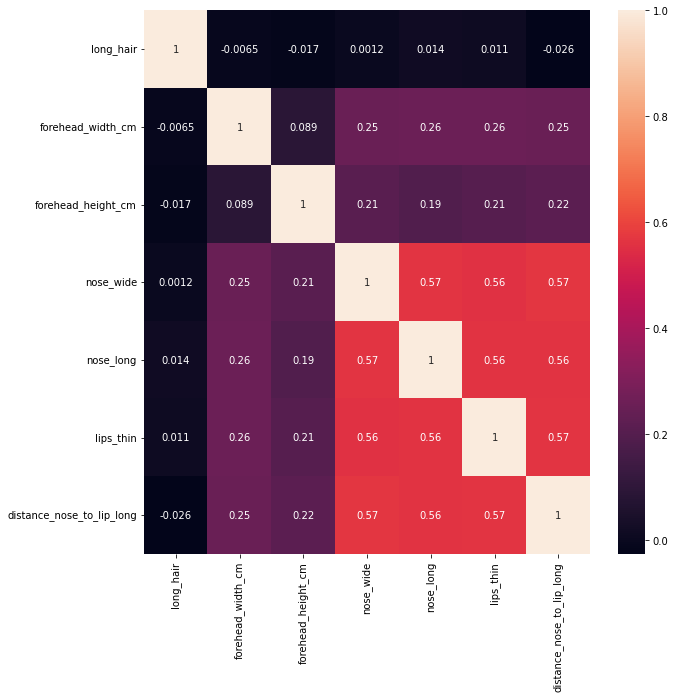

In [14]:
corrMatrix = df.corr()
plt.subplots(figsize=(10,10))         
sns.heatmap(df.corr(), annot=True)

In [30]:
encoder = LabelEncoder()
df.gender = encoder.fit_transform(df['gender'])

In [31]:
x = df.drop(columns='gender')
y = df.gender

In [32]:
scaler = MinMaxScaler()
scaler.fit(x)
x = scaler.transform(x)

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [37]:
model = RandomForestClassifier(n_estimators = 25, random_state = 42)

# Train the model on training data
model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=25, random_state=42)

In [38]:
prediction = model.predict(x_test)

print ("Accuracy = ", accuracy_score(y_test, prediction))

Accuracy =  0.958041958041958


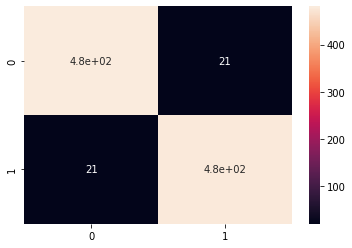

In [39]:
cm = confusion_matrix(y_test, prediction)
sns.heatmap(cm, annot=True)

In [40]:
cm

array([[481,  21],
       [ 21, 478]])